### Ride Sharing Price Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset into a pandas DataFrame
df = pd.read_csv('ride_sharing_dataset.csv')
#displaying the first 10 rows
df.head(10)


,distance_miles,duration_minutes,hour,day_of_week,weather,temperature,pickup_location,dropoff_location,vehicle_type,driver_rating,price
0,1.41,6.3,1,1,Light Rain,78.0,Downtown,Residential,Luxury,4.4,20.62
1,9.03,40.8,7,6,Clear,93.0,Downtown,Entertainment,Standard,4.7,48.30
2,3.95,13.8,14,6,Clear,49.0,Residential,Business,Standard,4.6,12.71
3,2.74,8.2,16,6,Light Rain,59.0,Entertainment,Business,Premium,3.8,14.38
4,0.51,3.0,5,5,Light Rain,31.0,Airport,Entertainment,Standard,4.5,6.47
5,0.51,3.2,21,1,Cloudy,74.0,Business,Business,Standard,3.4,5.04
6,0.50,3.0,22,5,Light Rain,71.0,Residential,Airport,Luxury,5.0,22.32
7,6.03,20.0,5,3,Clear,56.0,Business,Downtown,Standard,3.3,19.10
8,2.76,7.9,13,0,Light Rain,89.0,Business,Downtown,Standard,3.6,10.28
9,3.69,14.4,16,5,Cloudy,93.0,Business,Business,Standard,3.3,12.80


In [5]:
# showing the shape of the dataset, the number of (rows, columns)
print(df.shape)

(100000, 11)


In [7]:
# we can also access rows and columns individually
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print("\n")

Number of rows: 100000
Number of columns: 11




In [9]:
# to get dataset info
print("Summary information of the dataset:")
df.info()

Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance_miles    100000 non-null  float64
 1   duration_minutes  100000 non-null  float64
 2   hour              100000 non-null  int64  
 3   day_of_week       100000 non-null  int64  
 4   weather           100000 non-null  object 
 5   temperature       98772 non-null   float64
 6   pickup_location   100000 non-null  object 
 7   dropoff_location  100000 non-null  object 
 8   vehicle_type      100000 non-null  object 
 9   driver_rating     98728 non-null   float64
 10  price             100000 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 8.4+ MB


In [11]:
# checking for missing values in the entire DataFrame
print("DataFrame with boolean indicators for missing values:")
print(df.isnull())

DataFrame with boolean indicators for missing values:
       distance_miles  duration_minutes   hour  day_of_week  weather  \
0               False             False  False        False    False   
1               False             False  False        False    False   
2               False             False  False        False    False   
3               False             False  False        False    False   
4               False             False  False        False    False   
...               ...               ...    ...          ...      ...   
99995           False             False  False        False    False   
99996           False             False  False        False    False   
99997           False             False  False        False    False   
99998           False             False  False        False    False   
99999           False             False  False        False    False   

       temperature  pickup_location  dropoff_location  vehicle_type  \
0         

In [13]:
print("\nNumber of missing values per column:")
print(df.isnull().sum())


Number of missing values per column:
distance_miles         0
duration_minutes       0
hour                   0
day_of_week            0
weather                0
temperature         1228
pickup_location        0
dropoff_location       0
vehicle_type           0
driver_rating       1272
price                  0
dtype: int64


In [15]:
print("\nTotal number of missing values in the DataFrame:")
print(df.isnull().sum().sum())


Total number of missing values in the DataFrame:
2500


In [17]:
# displaying basic statistics for numerical columns
numerical_stats = df.describe()
print(numerical_stats)

       distance_miles  duration_minutes           hour    day_of_week  \
count   100000.000000     100000.000000  100000.000000  100000.000000   
mean         3.027364         11.646573      11.484920       2.997660   
std          2.943261         11.374444       6.920239       2.001203   
min          0.500000          3.000000       0.000000       0.000000   
25%          0.860000          3.500000       5.000000       1.000000   
50%          2.080000          7.600000      12.000000       3.000000   
75%          4.150000         15.300000      17.000000       5.000000   
max         35.220000        120.000000      23.000000       6.000000   

        temperature  driver_rating          price  
count  98772.000000   98728.000000  100000.000000  
mean      64.947283       4.174449      19.585327  
std       14.846502       0.554809      18.600097  
min       20.000000       1.500000       3.000000  
25%       55.000000       3.800000       8.190000  
50%       65.000000       4.20

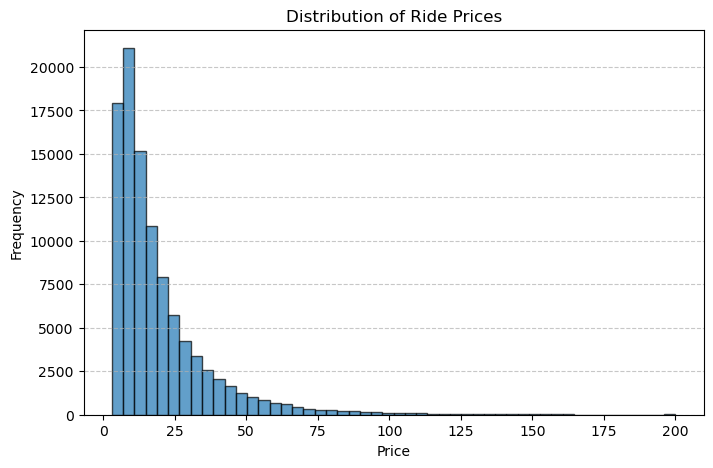

In [19]:
#showing the distribution of prices using histogram
plt.figure(figsize=(8,5))
plt.hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Ride Prices')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

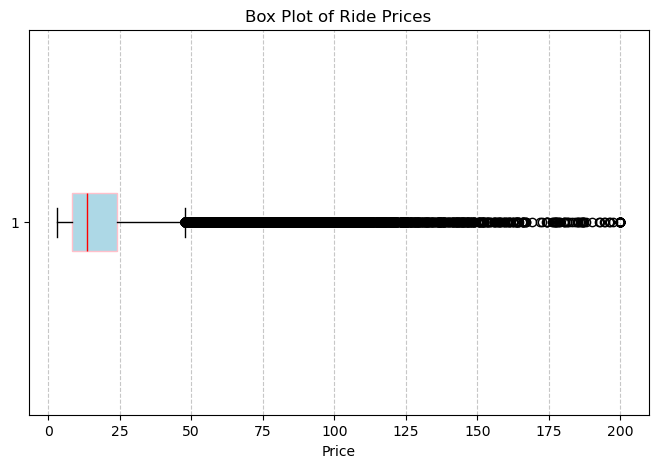

In [21]:
# Box plot for price distribution
plt.figure(figsize=(8,5))
plt.boxplot(df['price'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="pink"),
            medianprops=dict(color="red"))
plt.xlabel('Price')
plt.title('Box Plot of Ride Prices')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [23]:
#calculating key statistics
mean_price = df['price'].mean()
median_price = df['price'].median()
std_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
print("Key Statistics for Price:")
print(f"Mean   : {mean_price:.2f}")
print(f"Median : {median_price:.2f}")
print(f"Std Dev: {std_price:.2f}")
print(f"Min    : {min_price:.2f}")
print(f"Max    : {max_price:.2f}")

Key Statistics for Price:
Mean   : 19.59
Median : 13.60
Std Dev: 18.60
Min    : 3.00
Max    : 200.00


In [25]:
# Identifying and discussing any outliers
# Calculating Q1, Q3 and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]


print("Outlier Analysis for Price:")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {outliers.shape[0]}")
print(f"Percentage of Outliers: {100 * outliers.shape[0] / df.shape[0]:.2f}%")


print("\nSample Outliers:")
print(outliers[['price']].head())

Outlier Analysis for Price:
Q1 (25th percentile): 8.19
Q3 (75th percentile): 24.00
IQR: 15.81
Lower Bound: -15.53
Upper Bound: 47.72
Number of Outliers: 6953
Percentage of Outliers: 6.95%

Sample Outliers:
    price
1   48.30
11  58.77
33  54.79
50  70.15
53  68.56


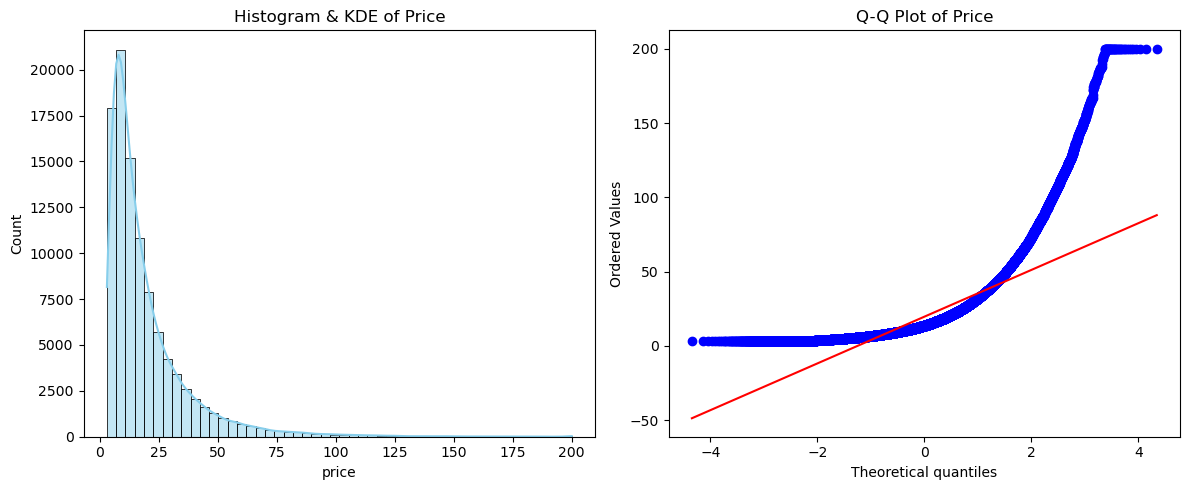

Normality Tests for Price:

Shapiro-Wilk Test: Statistic=0.6945, p-value=0.0000
D’Agostino-Pearson Test: Statistic=66322.6897, p-value=0.0000

Skewness: 3.0252
Kurtosis: 14.3524


In [27]:
from scipy.stats import shapiro, normaltest, skew, kurtosis
plt.figure(figsize=(12,5))

# Histogram with KDE
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title("Histogram & KDE of Price")

# Q-Q plot
plt.subplot(1,2,2)
import scipy.stats as stats
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Price")

plt.tight_layout()
plt.show()

# Statistical Tests
print("Normality Tests for Price:\n")

# Shapiro-Wilk Test
shapiro_test = shapiro(df['price'].sample(5000, random_state=42))  # sample due to Shapiro limit
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

# D’Agostino and Pearson’s Test
dagostino_test = normaltest(df['price'])
print(f"D’Agostino-Pearson Test: Statistic={dagostino_test.statistic:.4f}, p-value={dagostino_test.pvalue:.4f}")

# Skewness and Kurtosis
print(f"\nSkewness: {skew(df['price']):.4f}")
print(f"Kurtosis: {kurtosis(df['price']):.4f}")


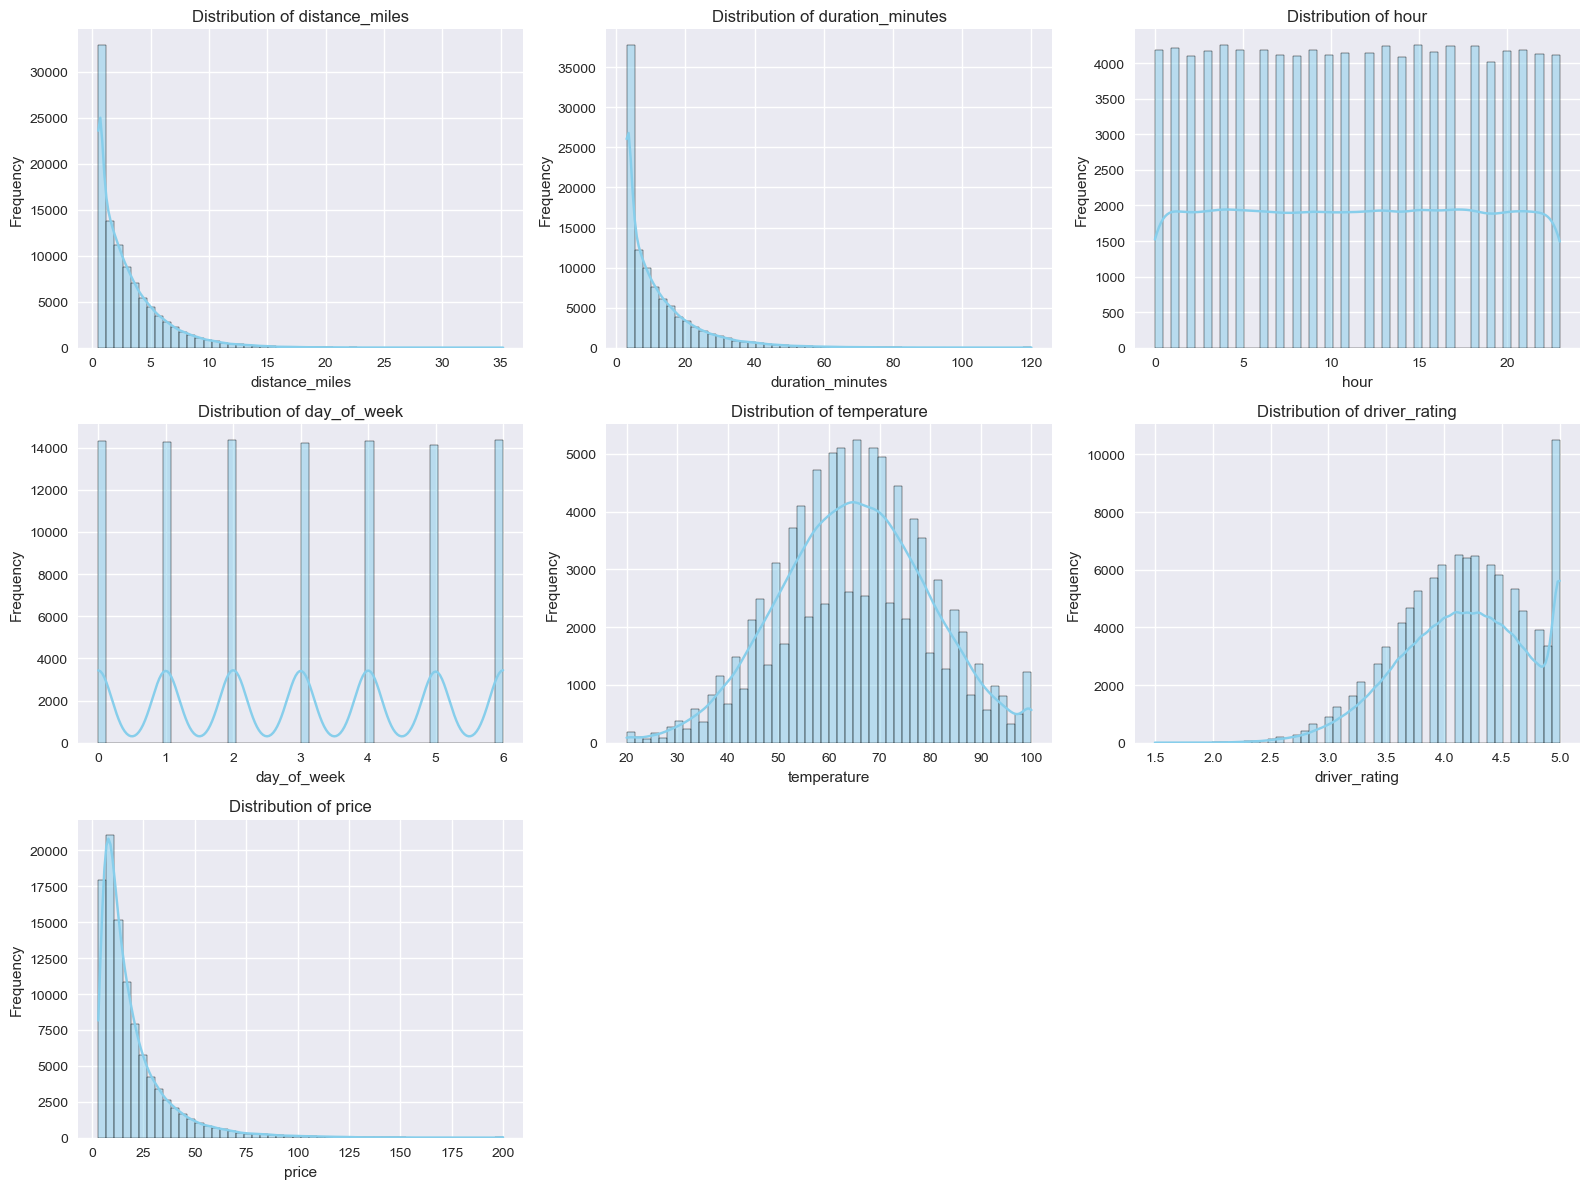

In [49]:
# Selecting numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distributions
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features) // 3 + 1, 3, i)
    sns.histplot(df[col], bins=50, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

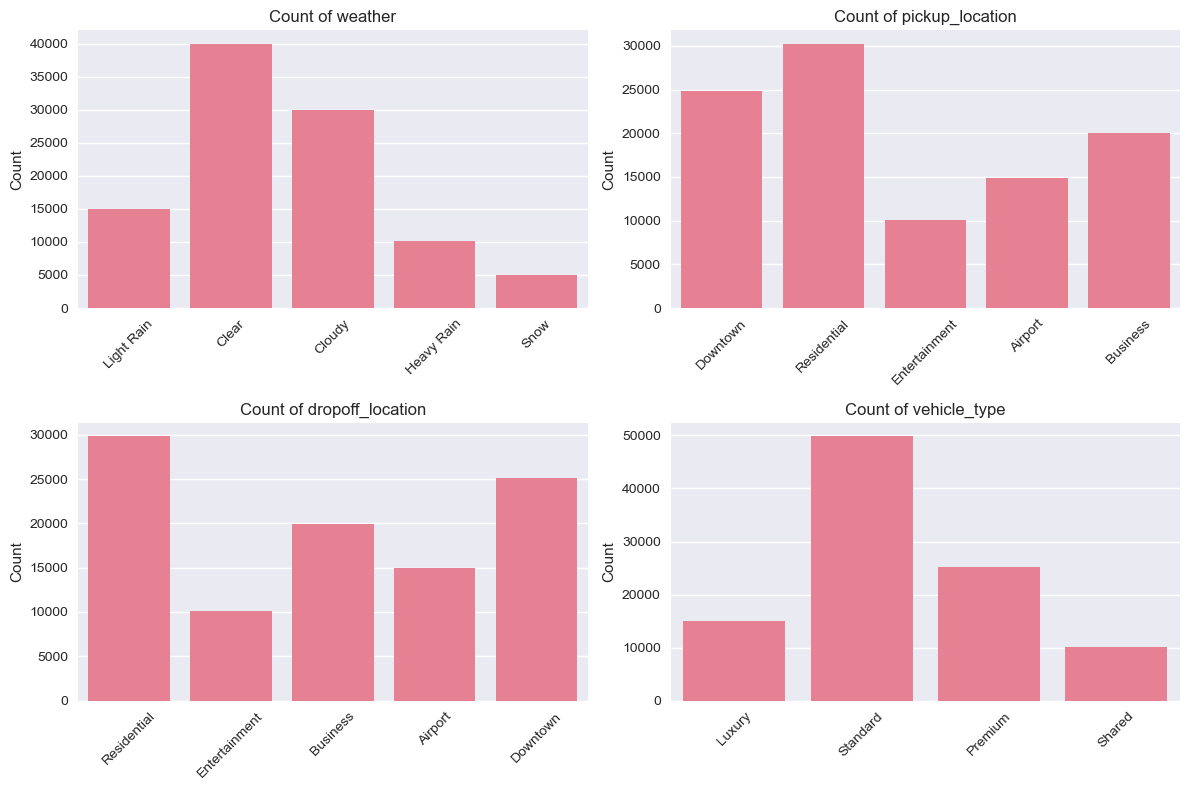

In [29]:
# Setting up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Identifying categorical columns
cols = [ 'weather', 'pickup_location', 
                      'dropoff_location', 'vehicle_type',]

n = len(cols)
cols_per_row = 2
rows = (n + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row*6, rows*4))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)


for ax in axes[n:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


Skewness of numerical features:
 price               3.025286
duration_minutes    2.444834
distance_miles      2.057985
day_of_week         0.003201
hour               -0.000001
temperature        -0.048469
driver_rating      -0.372001
dtype: float64


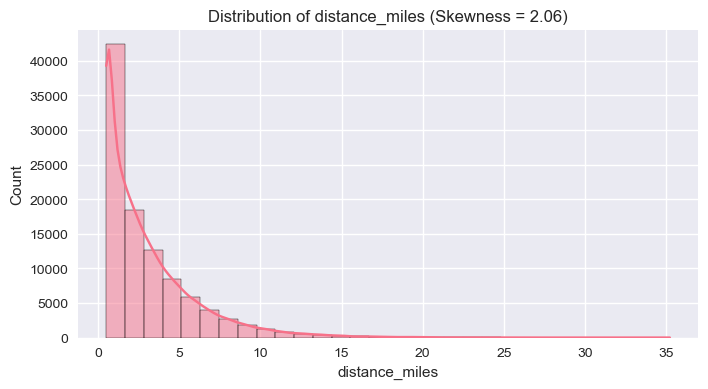

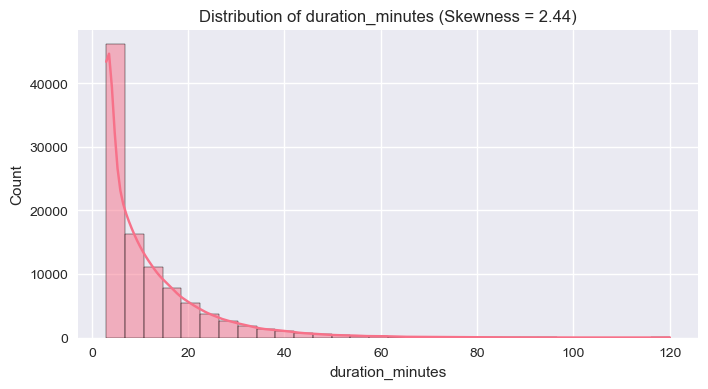

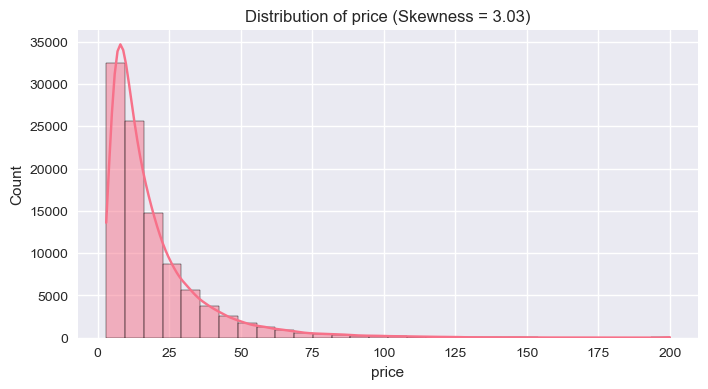

In [33]:
# Calculating skewness
num_features=['distance_miles', 'duration_minutes', 'hour', 'day_of_week', 'temperature', 'driver_rating','price']
skewness = df[num_features].skew().sort_values(ascending=False)
print("Skewness of numerical features:\n", skewness)

# Plot distributions for skewed features
for col in num_features:
    if abs(skewness[col]) > 1:   # threshold: |skew| > 1 = highly skewed
        plt.figure(figsize=(8,4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col} (Skewness = {skewness[col]:.2f})")
        plt.show()

Correlation Matrix:
                  distance_miles  duration_minutes      hour  day_of_week  \
distance_miles          1.000000          0.927078  0.001122     0.000299   
duration_minutes        0.927078          1.000000  0.024638    -0.001206   
hour                    0.001122          0.024638  1.000000     0.001233   
day_of_week             0.000299         -0.001206  0.001233     1.000000   
temperature            -0.005096         -0.005554 -0.000953     0.000653   
driver_rating          -0.002399         -0.000868 -0.004000    -0.001995   
price                   0.764690          0.827543  0.029611     0.010073   

                  temperature  driver_rating     price  
distance_miles      -0.005096      -0.002399  0.764690  
duration_minutes    -0.005554      -0.000868  0.827543  
hour                -0.000953      -0.004000  0.029611  
day_of_week          0.000653      -0.001995  0.010073  
temperature          1.000000      -0.004265 -0.004131  
driver_rating       -

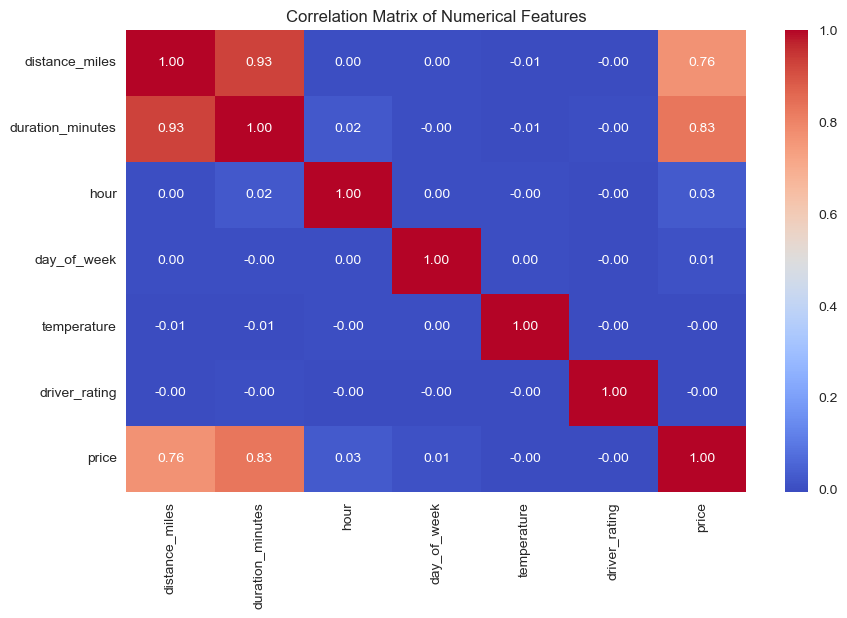

In [35]:
# Calculating correlation matrix
corr_matrix = df[num_features].corr()

print("Correlation Matrix:")
print(corr_matrix)

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [37]:

# Correlations with target feature 'price'
price_corr = corr_matrix['price'].drop('price')  # removing self-correlation

# Get top 3 correlated features
top3_features = price_corr.abs().sort_values(ascending=False).head(3)

print("Top 3 features most correlated with 'price':")
print(top3_features)


Top 3 features most correlated with 'price':
duration_minutes    0.827543
distance_miles      0.764690
hour                0.029611
Name: price, dtype: float64


Creating scatter plot: Price vs Distance


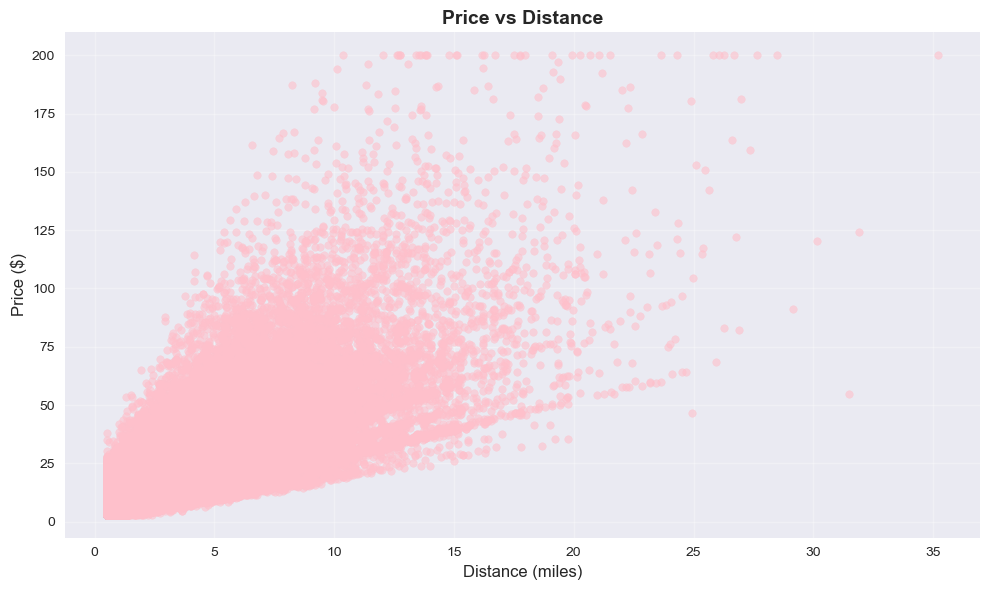

In [39]:

print("Creating scatter plot: Price vs Distance")

# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of price vs distance
plt.scatter(df['distance_miles'], df['price'], alpha=0.6, color='pink', s=30)

# Add labels and title
plt.xlabel('Distance (miles)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Price vs Distance', fontsize=14, fontweight='bold')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()



REGRESSION LINE: Price vs Distance
Regression equation: Price = 4.96 + 4.83 * Distance
Correlation coefficient (r): 0.7647
R-squared: 0.5848
P-value: 0.000000


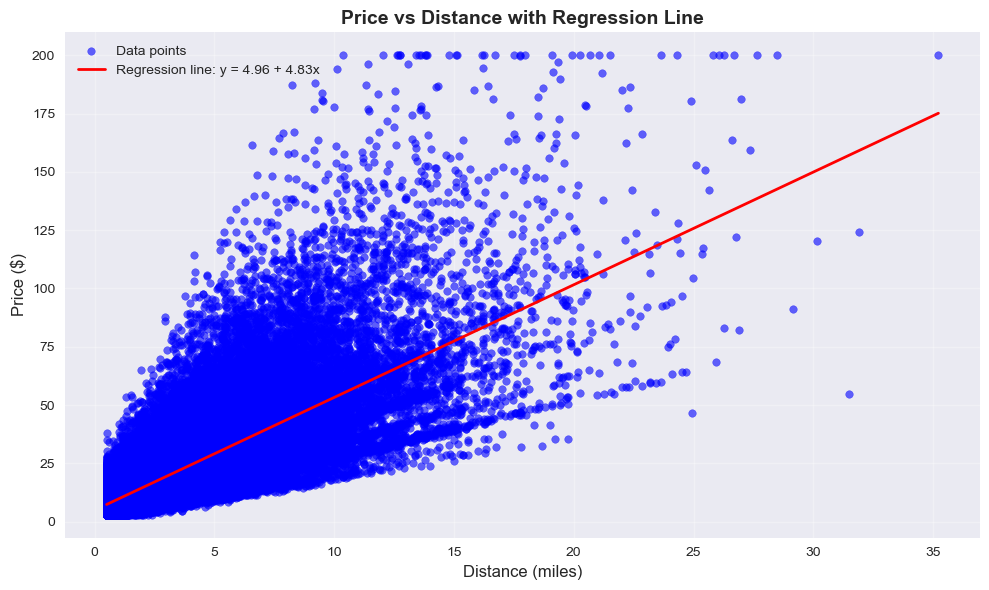

In [74]:

print("REGRESSION LINE: Price vs Distance")



# Calculating regression line using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(df['distance_miles'], df['price'])

print(f"Regression equation: Price = {intercept:.2f} + {slope:.2f} * Distance")
print(f"Correlation coefficient (r): {r_value:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.6f}")

# Creating scatter plot with regression line
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['distance_miles'], df['price'], alpha=0.6, color='blue', s=30, label='Data points')

# Regression line
x_values = np.linspace(df['distance_miles'].min(), df['distance_miles'].max(), 100)
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', linewidth=2, label=f'Regression line: y = {intercept:.2f} + {slope:.2f}x')

# Adding labels and title
plt.xlabel('Distance (miles)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Price vs Distance with Regression Line', fontsize=14, fontweight='bold')

# Adding grid and legend
plt.grid(True, alpha=0.3)
plt.legend()


plt.tight_layout()
plt.show()



In [41]:

from scipy.stats import pearsonr, spearmanr



# Calculating Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(df['price'], df['distance_miles'])

# Calculating Spearman correlation (monotonic relationship, robust to skewness)
spearman_corr, spearman_p = spearmanr(df['price'], df['distance_miles'])

print("📊 Relationship between Price and Distance")
print(f"Pearson Correlation: {pearson_corr:.3f} (p-value={pearson_p:.3f})")
print(f"Spearman Correlation: {spearman_corr:.3f} (p-value={spearman_p:.3f})")




📊 Relationship between Price and Distance
Pearson Correlation: 0.765 (p-value=0.000)
Spearman Correlation: 0.787 (p-value=0.000)


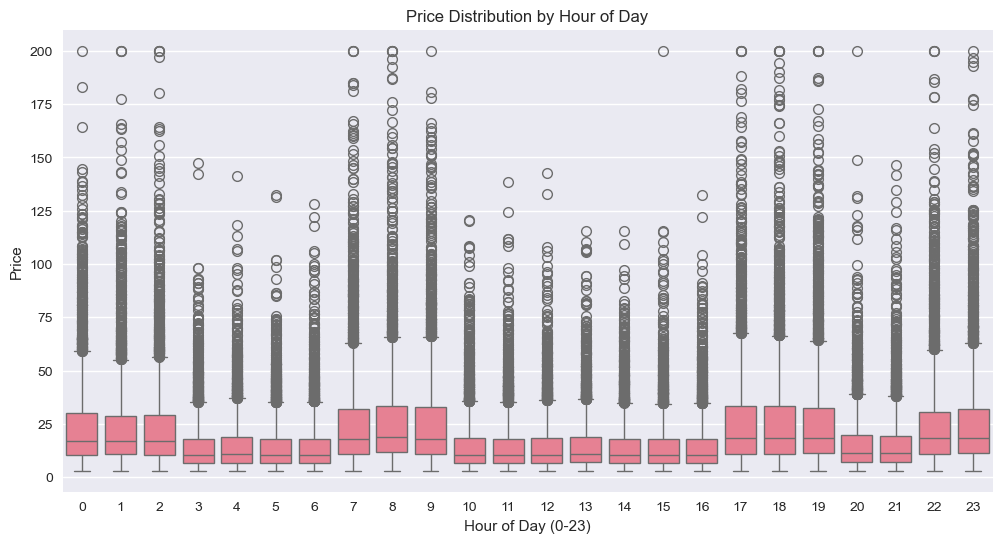

In [43]:



plt.figure(figsize=(12,6))
sns.boxplot(x='hour', y='price', data=df)
plt.title("Price Distribution by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Price")
plt.show()


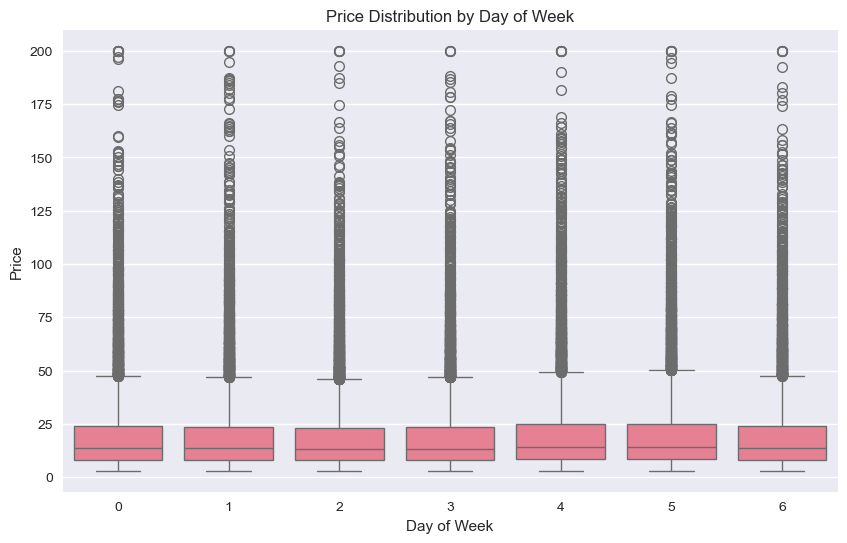

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_week', y='price', data=df)
plt.title("Price Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Price")
plt.show()

In [47]:
# Average price by hour
avg_price_hour = df.groupby('hour')['price'].mean().sort_values(ascending=False)
print("🏆 Peak Pricing Hours:")
print(avg_price_hour.head(5))  # top 5 peak hours

# Average price by day
avg_price_day = df.groupby('day_of_week')['price'].mean().sort_values(ascending=False)
print("\n🏆 Peak Pricing Days:")
print(avg_price_day.head(5))  # top 5 peak days

🏆 Peak Pricing Hours:
hour
18    26.601324
8     26.333935
19    26.114330
17    26.052074
23    25.879020
Name: price, dtype: float64

🏆 Peak Pricing Days:
day_of_week
5    20.417189
4    20.199138
1    19.517483
0    19.471876
6    19.329638
Name: price, dtype: float64


In [49]:


#  Average price by hour
avg_price_hour = df.groupby('hour')['price'].mean()
print("Average Price by Hour:\n", avg_price_hour)

#  Average price by day of week
avg_price_day = df.groupby('day_of_week')['price'].mean()
print("\nAverage Price by Day:\n", avg_price_day)


#  periods (morning/afternoon/evening/night)
def time_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_period'] = df['hour'].apply(time_period)
avg_price_period = df.groupby('time_period')['price'].mean()
print("\nAverage Price by Time Period:\n", avg_price_period)


Average Price by Hour:
 hour
0     23.725580
1     23.260403
2     23.579654
3     14.482690
4     14.860684
5     14.376365
6     14.533903
7     25.534571
8     26.333935
9     25.713350
10    14.799714
11    14.626037
12    14.690550
13    14.861587
14    14.419084
15    14.518565
16    14.542617
17    26.052074
18    26.601324
19    26.114330
20    15.969010
21    15.877255
22    25.134369
23    25.879020
Name: price, dtype: float64

Average Price by Day:
 day_of_week
0    19.471876
1    19.517483
2    18.929464
3    19.246275
4    20.199138
5    20.417189
6    19.329638
Name: price, dtype: float64

Average Price by Time Period:
 time_period
Afternoon    14.607591
Evening      23.684747
Morning      19.400675
Night        20.816007
Name: price, dtype: float64


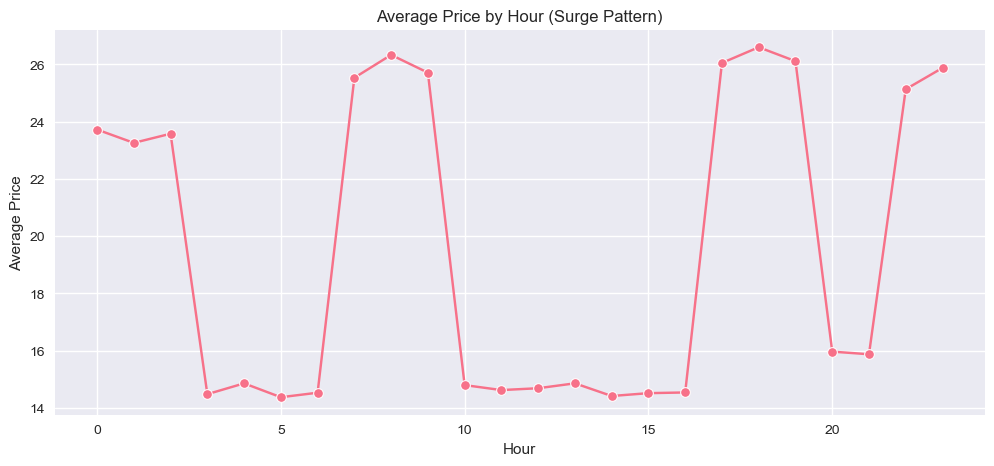

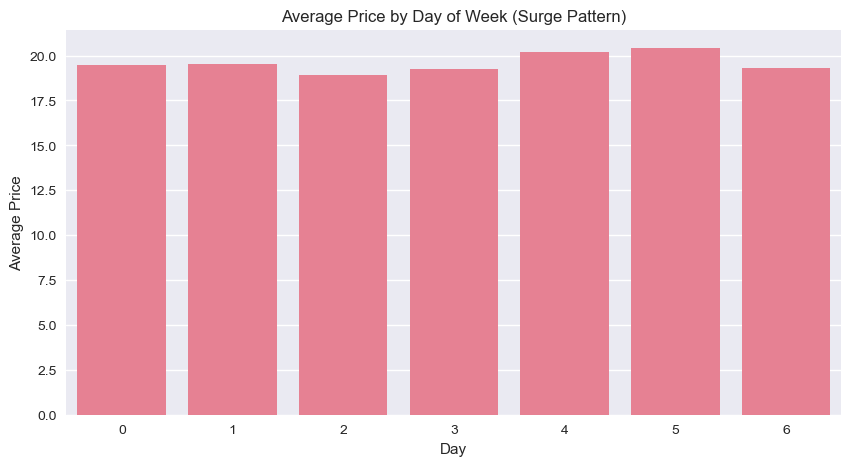

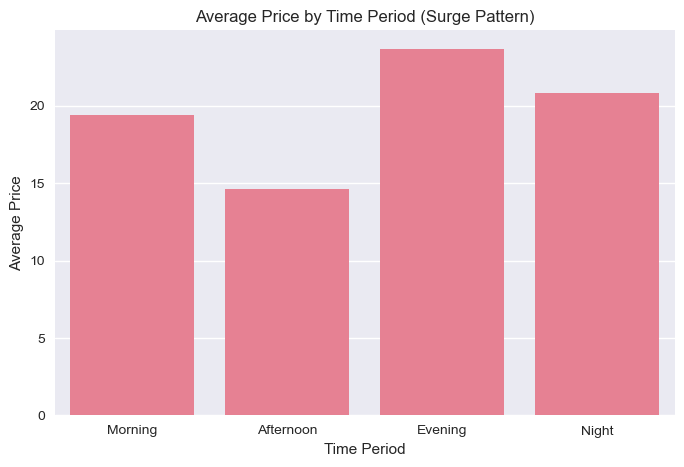

In [93]:
# surge pricing patterns
plt.figure(figsize=(12,5))
sns.lineplot(x=avg_price_hour.index, y=avg_price_hour.values, marker='o')
plt.title("Average Price by Hour (Surge Pattern)")
plt.xlabel("Hour")
plt.ylabel("Average Price")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_day.index, y=avg_price_day.values)
plt.title("Average Price by Day of Week (Surge Pattern)")
plt.xlabel("Day")
plt.ylabel("Average Price")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_period.index, y=avg_price_period.values, order=['Morning','Afternoon','Evening','Night'])
plt.title("Average Price by Time Period (Surge Pattern)")
plt.xlabel("Time Period")
plt.ylabel("Average Price")
plt.show()

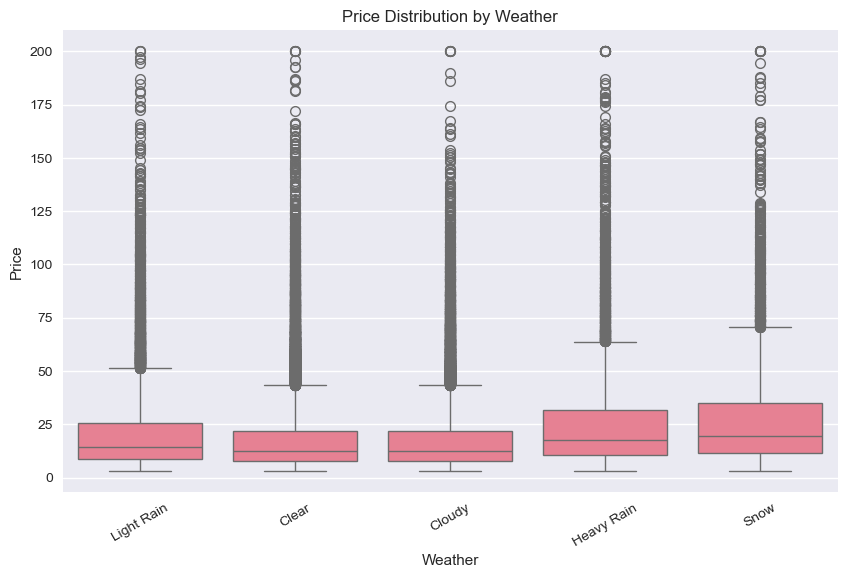

In [51]:

plt.figure(figsize=(10,6))
sns.boxplot(x='weather', y='price', data=df)
plt.title("Price Distribution by Weather")
plt.xlabel("Weather")
plt.ylabel("Price")
plt.xticks(rotation=30)  # rotate x labels if needed
plt.show()


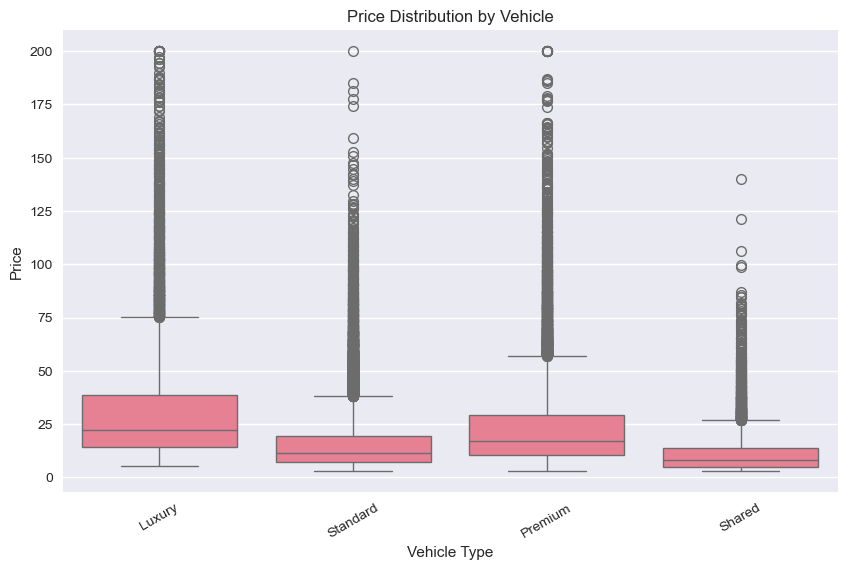

In [86]:

plt.figure(figsize=(10,6))
sns.boxplot(x='vehicle_type', y='price', data=df)
plt.title("Price Distribution by Vehicle")
plt.xlabel("Vehicle Type")
plt.ylabel("Price")
plt.xticks(rotation=30)  # rotate x labels if needed
plt.show()


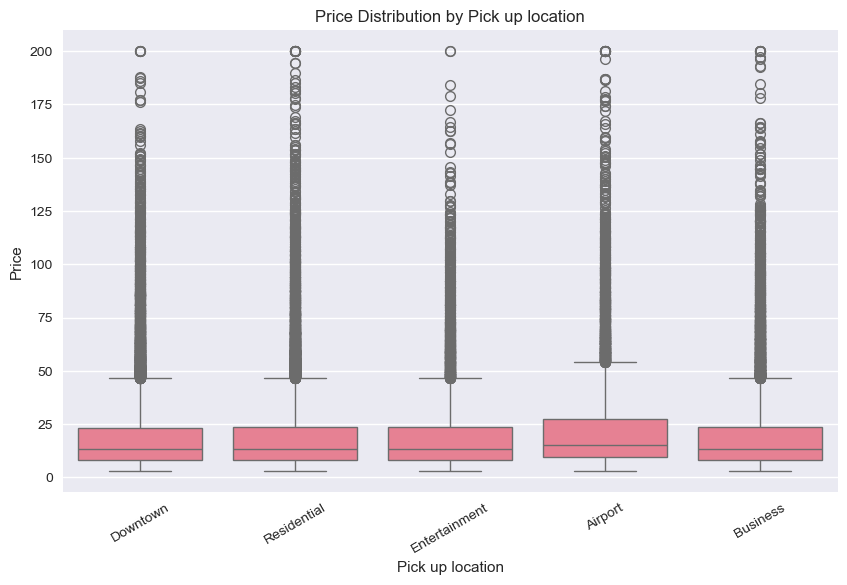

In [53]:

plt.figure(figsize=(10,6))
sns.boxplot(x='pickup_location', y='price', data=df)
plt.title("Price Distribution by Pick up location")
plt.xlabel("Pick up location")
plt.ylabel("Price")
plt.xticks(rotation=30)  # rotate x labels if needed
plt.show()


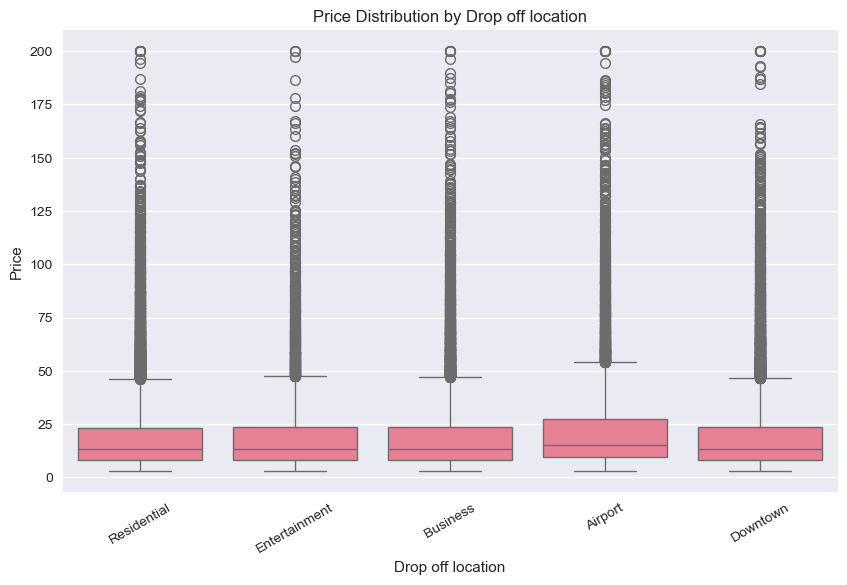

In [90]:

plt.figure(figsize=(10,6))
sns.boxplot(x='dropoff_location', y='price', data=df)
plt.title("Price Distribution by Drop off location")
plt.xlabel("Drop off location")
plt.ylabel("Price")
plt.xticks(rotation=30)  # rotate x labels if needed
plt.show()


In [55]:


# List of categorical features
categories = ['weather', 'pickup_location', 'dropoff_location', 'vehicle_type']

for cat in categories:
    avg_price = df.groupby(cat)['price'].mean().sort_values(ascending=False)
    print(f"📌 Average Price by {cat}:\n", avg_price.head(5), "\n")  # top 5 premium categories


📌 Average Price by weather:
 weather
Snow          28.097480
Heavy Rain    25.476359
Light Rain    20.817172
Clear         17.880555
Cloudy        17.823261
Name: price, dtype: float64 

📌 Average Price by pickup_location:
 pickup_location
Airport          22.175483
Entertainment    19.238614
Business         19.150992
Residential      19.128249
Downtown         19.076829
Name: price, dtype: float64 

📌 Average Price by dropoff_location:
 dropoff_location
Airport          22.129775
Entertainment    19.237409
Business         19.223147
Downtown         19.145825
Residential      19.035538
Name: price, dtype: float64 

📌 Average Price by vehicle_type:
 vehicle_type
Luxury      31.303847
Premium     23.610292
Standard    15.730984
Shared      11.211223
Name: price, dtype: float64 



In [57]:


# Check for missing values
missing_values = df.isnull().sum()

# columns with at least one missing value
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values:\n")
print(missing_columns)


Columns with missing values:

temperature      1228
driver_rating    1272
dtype: int64


In [61]:
import pandas as pd
from sklearn.impute import SimpleImputer

cols_to_impute = ['temperature', 'driver_rating']

# Creating median imputer
median_imputer = SimpleImputer(strategy='median')


df[cols_to_impute] = median_imputer.fit_transform(df[cols_to_impute])

# Verifying imputation
print("Missing values after imputation:\n")
print(df[cols_to_impute].isnull().sum())


Missing values after imputation:

temperature      0
driver_rating    0
dtype: int64


In [63]:

categorical_cols = ['weather', 'pickup_location', 'dropoff_location', 'vehicle_type']

# Applying One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # drop_first=True avoids multicollinearity

# Check the new columns
print("Columns after One-Hot Encoding:\n")
print(df_encoded.columns)


Columns after One-Hot Encoding:

Index(['distance_miles', 'duration_minutes', 'hour', 'day_of_week',
       'temperature', 'driver_rating', 'price', 'time_period',
       'weather_Cloudy', 'weather_Heavy Rain', 'weather_Light Rain',
       'weather_Snow', 'pickup_location_Business', 'pickup_location_Downtown',
       'pickup_location_Entertainment', 'pickup_location_Residential',
       'dropoff_location_Business', 'dropoff_location_Downtown',
       'dropoff_location_Entertainment', 'dropoff_location_Residential',
       'vehicle_type_Premium', 'vehicle_type_Shared', 'vehicle_type_Standard'],
      dtype='object')


In [65]:


# --- Before Encoding ---
print("📌 Columns before encoding:\n")
print(df.head())
print("\nColumn names before encoding:\n", df.columns)

# --- Implement One-Hot Encoding ---
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- After Encoding ---
print("\n📌 Columns after One-Hot Encoding:\n")
print(df_encoded.head())
print("\nColumn names after encoding:\n", df_encoded.columns)
print("\nTotal columns before encoding:", len(df.columns))
print("Total columns after encoding:", len(df_encoded.columns))


📌 Columns before encoding:

   distance_miles  duration_minutes  hour  day_of_week     weather  \
0            1.41               6.3     1            1  Light Rain   
1            9.03              40.8     7            6       Clear   
2            3.95              13.8    14            6       Clear   
3            2.74               8.2    16            6  Light Rain   
4            0.51               3.0     5            5  Light Rain   

   temperature pickup_location dropoff_location vehicle_type  driver_rating  \
0         78.0        Downtown      Residential       Luxury            4.4   
1         93.0        Downtown    Entertainment     Standard            4.7   
2         49.0     Residential         Business     Standard            4.6   
3         59.0   Entertainment         Business      Premium            3.8   
4         31.0         Airport    Entertainment     Standard            4.5   

   price time_period  
0  20.62       Night  
1  48.30     Morning  
2  12.7

In [69]:


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in numeric_cols:
    print(f"Feature: {col}")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}, Mean: {df[col].mean()}\n")


Feature: distance_miles
Min: 0.5, Max: 35.22, Mean: 3.0273641000000002

Feature: duration_minutes
Min: 3.0, Max: 120.0, Mean: 11.646573

Feature: hour
Min: 0, Max: 23, Mean: 11.48492

Feature: day_of_week
Min: 0, Max: 6, Mean: 2.99766

Feature: temperature
Min: 20.0, Max: 100.0, Mean: 64.94793

Feature: driver_rating
Min: 1.5, Max: 5.0, Mean: 4.174774000000001

Feature: price
Min: 3.0, Max: 200.0, Mean: 19.585327399999997



In [83]:

from sklearn.preprocessing import StandardScaler




numeric_features = ['distance_miles', 'duration_minutes','hour', 'day_of_week', 'temperature', 'driver_rating', 'price']


scaler = StandardScaler()


df[numeric_features] = scaler.fit_transform(df[numeric_features])


print("Scaled features:\n")
print(df[numeric_features].describe())
print("Scaling is important in machine learning because many models are sensitive to the magnitude of input features. If features have very different ranges, it can negatively impact model performance.")


Scaled features:

       distance_miles  duration_minutes          hour   day_of_week  \
count    1.000000e+05      1.000000e+05  1.000000e+05  1.000000e+05   
mean     1.158185e-17     -1.548983e-17 -3.801404e-17 -2.351896e-17   
std      1.000005e+00      1.000005e+00  1.000005e+00  1.000005e+00   
min     -8.586996e-01     -7.601792e-01 -1.659621e+00 -1.497936e+00   
25%     -7.363856e-01     -7.162208e-01 -9.370995e-01 -9.982344e-01   
50%     -3.218773e-01     -3.557618e-01  7.443132e-02  1.169302e-03   
75%      3.814278e-01      3.211977e-01  7.969533e-01  1.000573e+00   
max      1.093780e+01      9.526089e+00  1.663980e+00  1.500275e+00   

        temperature  driver_rating         price  
count  1.000000e+05   1.000000e+05  1.000000e+05  
mean   2.103206e-17  -4.121148e-18  2.231104e-17  
std    1.000005e+00   1.000005e+00  1.000005e+00  
min   -3.046287e+00  -4.851985e+00 -8.916841e-01  
25%   -6.742079e-01  -6.798323e-01 -6.126519e-01  
50%    3.528976e-03   4.575944e-02 -

In [85]:

import pandas as pd
import numpy as np



# Average speed (miles per minute)
df['avg_speed_mpm'] = df['distance_miles'] / df['duration_minutes']

# converting to miles per hour
df['avg_speed_mph'] = df['avg_speed_mpm'] * 60

# Peak hour flag (1 if ride is during rush hours, else 0)
df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 10) or (17 <= x <= 20) else 0)


df['ride_length_category'] = pd.cut(df['duration_minutes'],
                                    bins=[0, 10, 30, np.inf],
                                    labels=['Short', 'Medium', 'Long'])


print(df[['avg_speed_mph', 'is_peak_hour', 'ride_length_category']].head())


   avg_speed_mph  is_peak_hour ride_length_category
0      70.143105             0                  NaN
1      47.742491             0                Short
2      99.346572             0                Short
3      19.332932             0                  NaN
4      67.507918             0                  NaN


In [87]:
print("""
📌 New Feature: Average Speed (avg_speed_mph)
- Definition: distance_miles / duration_minutes * 60 → miles per hour
- Business Logic:
    • Captures how fast a ride is completed.
    • Higher speeds may indicate less traffic, affecting ride satisfaction and pricing.
    • Extremely low speeds may indicate heavy traffic, possibly triggering higher prices.
- Use Case: Helps models detect how traffic patterns impact price and customer experience.

📌 New Feature: Peak Hour Flag (is_peak_hour)
- Definition: Binary flag = 1 if ride occurs during morning (7–10) or evening (17–20) rush hours, else 0
- Business Logic:
    • Rides during peak hours are in higher demand, often triggering surge pricing.
    • Helps the model understand temporal price fluctuations without inferring purely from hour.
- Use Case: Improves prediction of price spikes, particularly for dynamic pricing systems.

📌 New Feature: Ride Length Category (ride_length_category)
- Definition: Categorical bucket for ride duration:
      Short: 0–10 min
      
      Medium: 10–30 min

      Long: >30 min
- Business Logic:
    • Converts continuous ride duration into meaningful business segments.
    • Long rides may incur higher base fare and distance-based charges; short rides influenced by minimum fare.
- Use Case: Helps the model capture non-linear relationships between ride length and price.
""")




📌 New Feature: Average Speed (avg_speed_mph)
- Definition: distance_miles / duration_minutes * 60 → miles per hour
- Business Logic:
    • Captures how fast a ride is completed.
    • Higher speeds may indicate less traffic, affecting ride satisfaction and pricing.
    • Extremely low speeds may indicate heavy traffic, possibly triggering higher prices.
- Use Case: Helps models detect how traffic patterns impact price and customer experience.

📌 New Feature: Peak Hour Flag (is_peak_hour)
- Definition: Binary flag = 1 if ride occurs during morning (7–10) or evening (17–20) rush hours, else 0
- Business Logic:
    • Rides during peak hours are in higher demand, often triggering surge pricing.
    • Helps the model understand temporal price fluctuations without inferring purely from hour.
- Use Case: Improves prediction of price spikes, particularly for dynamic pricing systems.

📌 New Feature: Ride Length Category (ride_length_category)
- Definition: Categorical bucket for ride duration:

In [89]:

import pandas as pd
from sklearn.model_selection import train_test_split


x = df.drop('price', axis=1)  
y = df['price']               

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


print("Training set size:", x_train.shape[0])
print("Testing set size:", x_test.shape[0])


Training set size: 80000
Testing set size: 20000


In [79]:
import pandas as pd

In [91]:
dt = pd.read_csv('ride_sharing_dataset_cleaned.csv')
dt.head()


,distance_miles,duration_minutes,hour,day_of_week,weather,temperature,pickup_location,dropoff_location,vehicle_type,driver_rating,price
0,1.41,6.3,1,1,Light Rain,78.0,Downtown,Residential,Luxury,4.4,20.62
1,9.03,40.8,7,6,Clear,93.0,Downtown,Entertainment,Standard,4.7,48.30
2,3.95,13.8,14,6,Clear,49.0,Residential,Business,Standard,4.6,12.71
3,2.74,8.2,16,6,Light Rain,59.0,Entertainment,Business,Premium,3.8,14.38
4,0.51,3.0,5,5,Light Rain,31.0,Airport,Entertainment,Standard,4.5,6.47


C:\Users\Lenovo\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 10.45, MAE: 6.66, R²: 0.70


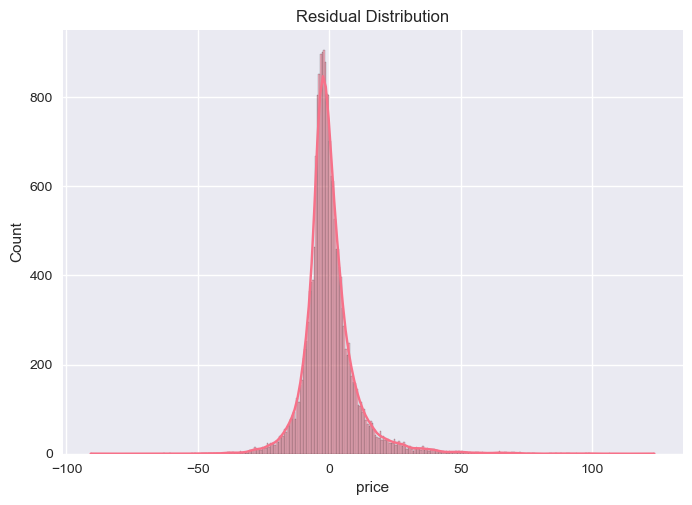

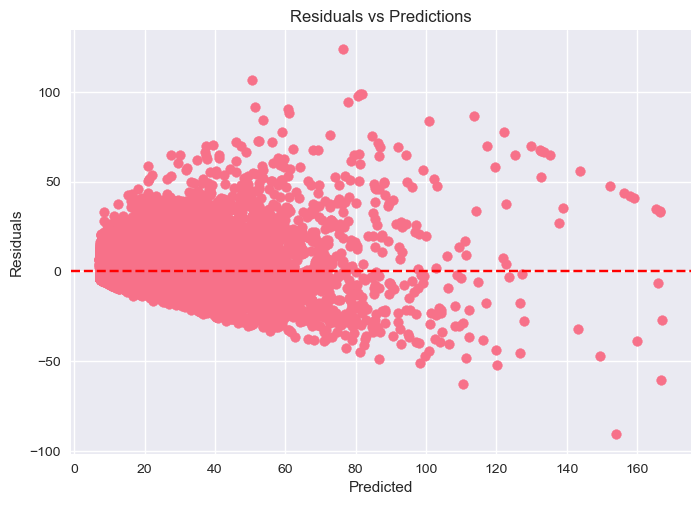

In [93]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("ride_sharing_dataset_cleaned.csv")


X = df.drop("price", axis=1).select_dtypes(include=["number"]) 
y = df["price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

# Residual analysis
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()


C:\Users\Lenovo\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 13.64, MAE: 8.34, R²: 0.48


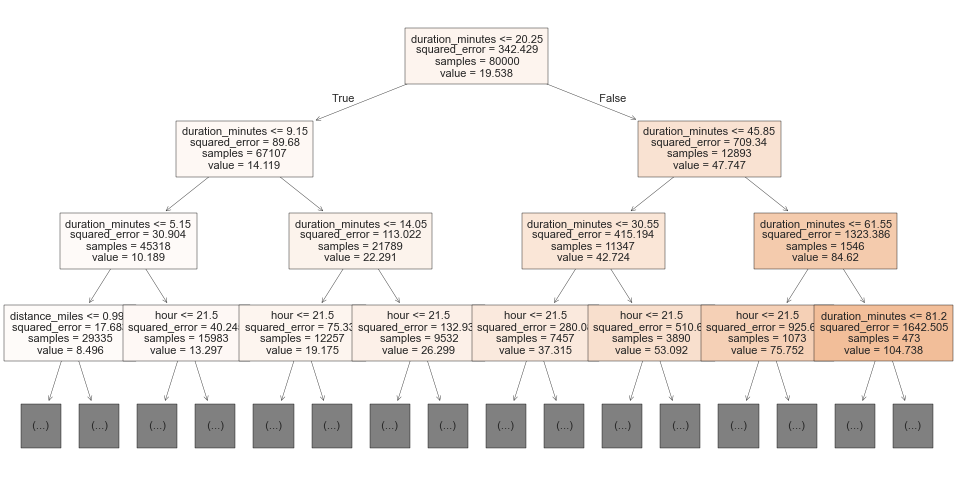

Feature Importance:
 duration_minutes    0.728677
distance_miles      0.076116
hour                0.073440
temperature         0.051777
driver_rating       0.042141
day_of_week         0.027848
dtype: float64


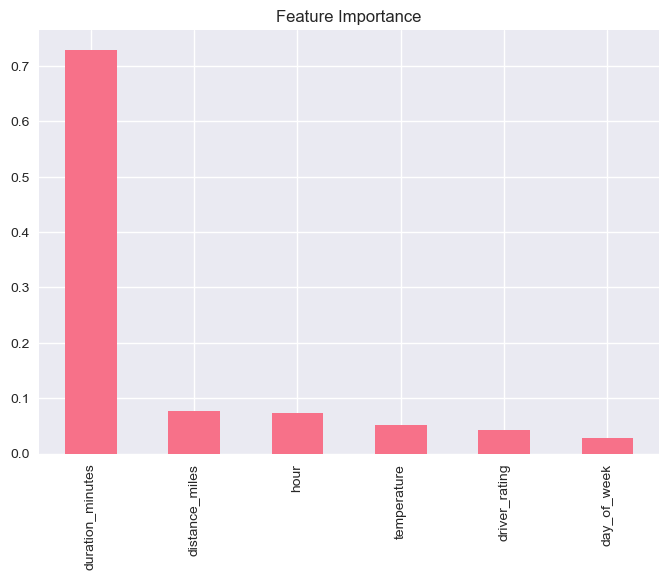

In [142]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt




X = df.drop("price", axis=1).select_dtypes(include=["number"])
y = df["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")


plt.figure(figsize=(12,6))
plot_tree(dt, feature_names=X.columns, max_depth=3, filled=True, fontsize=8)
plt.show()

# Feature importance
importances = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", importances)
importances.plot(kind='bar', title="Feature Importance")
plt.show()


In [95]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt




X = df.drop("price", axis=1).sel
y = df["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")


plt.figure(figsize=(12,6))
plot_tree(dt, feature_names=X.columns, max_depth=3, filled=True, fontsize=8)
plt.show()

# Feature importance
importances = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", importances)
importances.plot(kind='bar', title="Feature Importance")
plt.show()


AttributeError: 'DataFrame' object has no attribute 'sel'

C:\Users\Lenovo\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree -> RMSE: 13.64, MAE: 8.34, R²: 0.48
Random Forest -> RMSE: 9.91, MAE: 6.20, R²: 0.73

Random Forest Feature Importance:
 duration_minutes    0.731675
hour                0.074099
distance_miles      0.073978
temperature         0.052858
driver_rating       0.040540
day_of_week         0.026850
dtype: float64


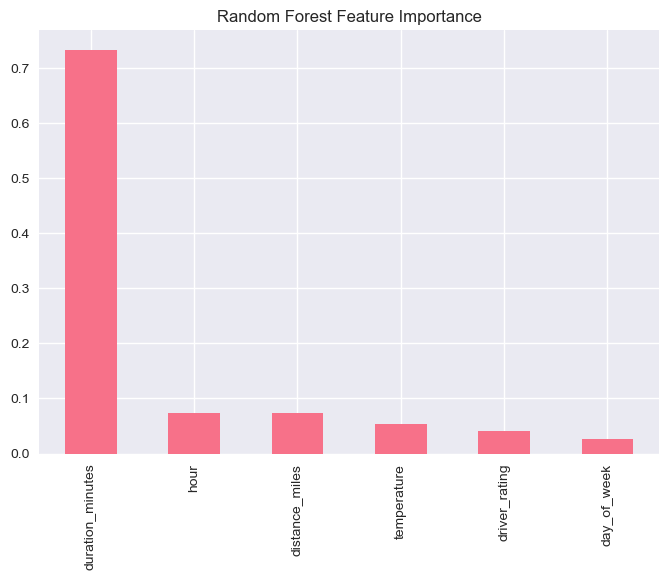

In [99]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv("ride_sharing_dataset_cleaned.csv")


X = df.drop("price", axis=1).select_dtypes(include=["number"])
y = df["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree (baseline)
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluation function
def evaluate(y_true, y_pred, name):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

evaluate(y_test, dt_pred, "Decision Tree")
evaluate(y_test, rf_pred, "Random Forest")

# Feature importance (Random Forest)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importance:\n", importances)
importances.plot(kind="bar", title="Random Forest Feature Importance")
plt.show()


In [100]:
#Q_4.6
from sklearn.ensemble import VotingRegressor

# Base models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Voting Regressor
vr = VotingRegressor([("lr", lr), ("dt", dt), ("rf", rf)])
vr.fit(X_train, y_train)

# Predictions
lr_pred = lr.fit(X_train, y_train).predict(X_test)
dt_pred = dt.fit(X_train, y_train).predict(X_test)
rf_pred = rf.fit(X_train, y_train).predict(X_test)
vr_pred = vr.predict(X_test)

# Evaluation
for name, pred in {
    "Linear Regression": lr_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "Voting Regressor": vr_pred
}.items():
    rmse = mean_squared_error(y_test, pred, squared=False)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{name} -> RMSE:{rmse:.2f}, MAE:{mae:.2f}, R²:{r2:.2f}")


Linear Regression -> RMSE:10.45, MAE:6.66, R²:0.70
Decision Tree -> RMSE:13.64, MAE:8.34, R²:0.48
Random Forest -> RMSE:9.91, MAE:6.20, R²:0.73
Voting Regressor -> RMSE:10.28, MAE:6.43, R²:0.71


C:\Users\Lenovo\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To

              Model  RMSE_test  MAE_test   R2_test  CV_RMSE_mean  CV_RMSE_std
0      RandomForest   4.730673  2.720470  0.937842      4.729095     0.059446
1  GradientBoosting   6.204728  3.579075  0.893071      6.211146     0.085595
2      DecisionTree   6.434617  3.650710  0.885001      6.519772     0.089763
3  LinearRegression   8.123601  5.304931  0.816706      8.145122     0.094640


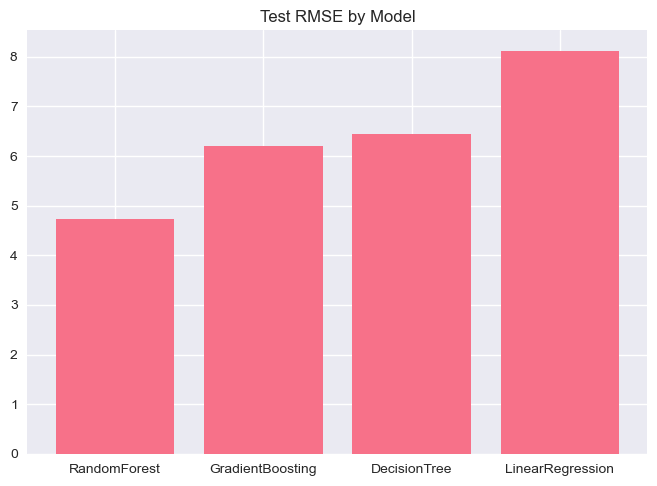

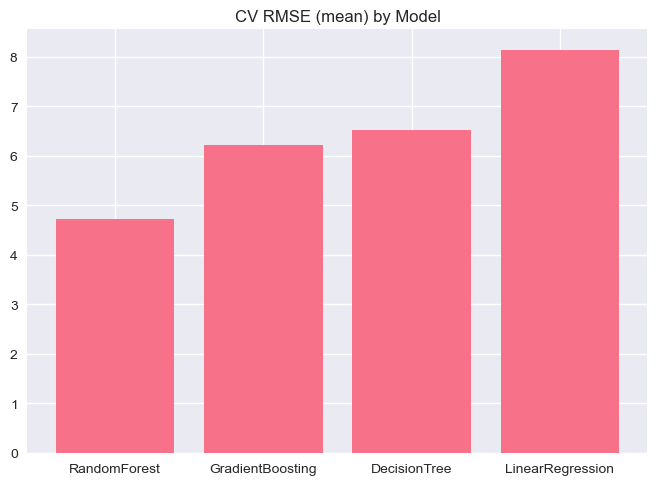

Best by Test RMSE: RandomForest 4.730673209679523
Best by CV RMSE: RandomForest 4.729094745979345


In [100]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------------
# 1) Load data
dt = pd.read_csv("ride_sharing_dataset_cleaned.csv")

# 2) Define columns manually
num_cols = ["distance_miles", "duration_minutes", "hour", "day_of_week", "temperature", "driver_rating"]
cat_cols = ["weather", "pickup_location", "dropoff_location", "vehicle_type"]
target = "price"

# 3) Features / target
X = dt[num_cols + cat_cols]
y = dt[target]

# 4) One-hot encode categorical
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 5) Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6) Define models
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=1),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=50, random_state=42)
}

# 7) Train, evaluate, cross-validate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    cv_rmse = np.sqrt(-cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error"))
    results.append({
        "Model": name,
        "RMSE_test": rmse,
        "MAE_test": mae,
        "R2_test": r2,
        "CV_RMSE_mean": cv_rmse.mean(),
        "CV_RMSE_std": cv_rmse.std()
    })

# 8) Comparison table
results_df = pd.DataFrame(results).sort_values("RMSE_test").reset_index(drop=True)
print(results_df)

# 9) Plots
plt.bar(results_df["Model"], results_df["RMSE_test"])
plt.title("Test RMSE by Model")
plt.show()

plt.bar(results_df["Model"], results_df["CV_RMSE_mean"])
plt.title("CV RMSE (mean) by Model")
plt.show()

# 10) Best models
best_test = results_df.loc[results_df["RMSE_test"].idxmin()]
best_cv = results_df.loc[results_df["CV_RMSE_mean"].idxmin()]
print("Best by Test RMSE:", best_test["Model"], best_test["RMSE_test"])
print("Best by CV RMSE:", best_cv["Model"], best_cv["CV_RMSE_mean"])


DecisionTree - Test RMSE: 7.1166
RandomForest - Test RMSE: 5.0461
GradientBoosting - Test RMSE: 6.2047
LinearRegression - Test RMSE: 8.1236


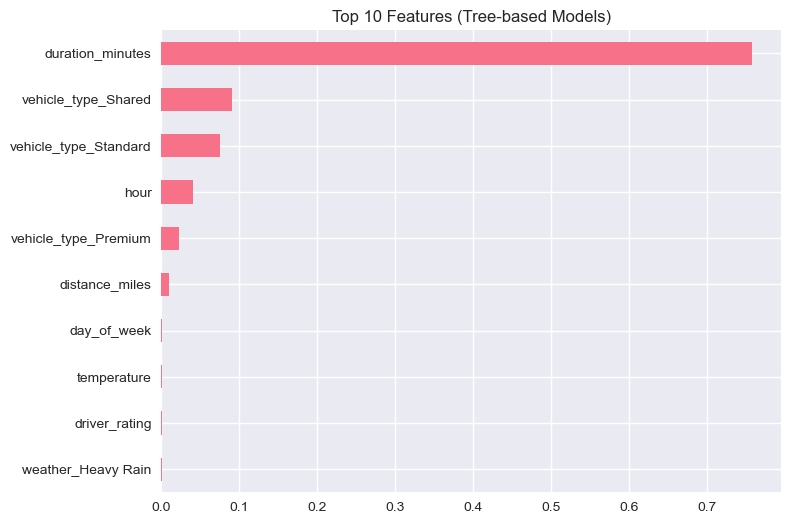

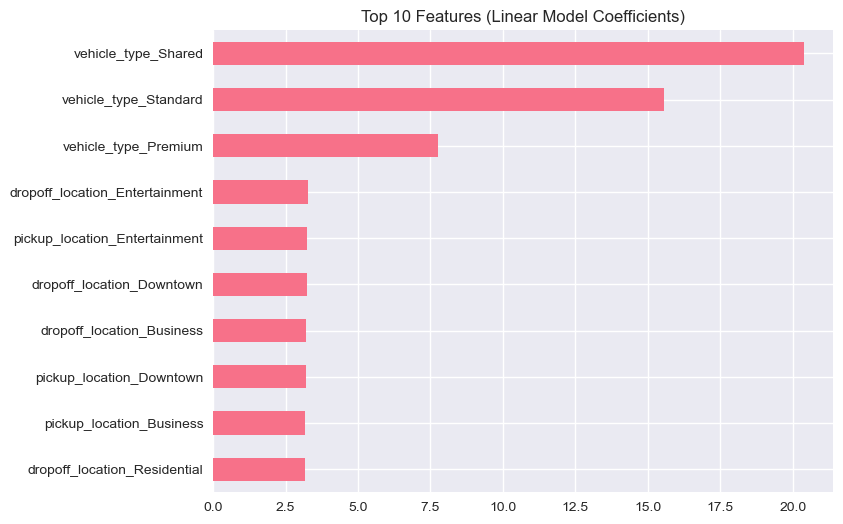


Business Implications & Actionable Insights:

1. duration_minutes
   - Longer duration raises price. Action: improve ETA accuracy, suggest faster routes, compensate drivers for delays.
2. vehicle_type_Shared
   - Vehicle type impacts price. Action: upsell premium vehicles, optimize driver incentives.
3. vehicle_type_Standard
   - Vehicle type impacts price. Action: upsell premium vehicles, optimize driver incentives.
4. hour
   - Time of day impacts price. Action: use surge pricing at peaks, encourage drivers in high-demand hours.
5. vehicle_type_Premium
   - Vehicle type impacts price. Action: upsell premium vehicles, optimize driver incentives.
6. distance_miles
   - Longer rides raise price. Action: adjust distance-based pricing tiers, promote long-trip packages.
7. day_of_week
   - Weekday patterns affect demand. Action: tailor promotions by weekday/weekend.
8. temperature
   - Important driver of price. Action: analyze further and optimize strategy.


In [103]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1) Load dataset
dt = pd.read_csv("ride_sharing_dataset_cleaned.csv")

# 2) Define features
num_cols = ["distance_miles", "duration_minutes", "hour", "day_of_week", "temperature", "driver_rating"]
cat_cols = ["weather", "pickup_location", "dropoff_location", "vehicle_type"]
target = "price"

X = dt[num_cols + cat_cols]
y = dt[target]

# One-hot encode categorical
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4) Models
models = {
    "DecisionTree": DecisionTreeRegressor(max_depth=6, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=1),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42),
    "LinearRegression": LinearRegression()
}

feature_importances = {}
linear_coefs = None

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name} - Test RMSE: {rmse:.4f}")
    
    if hasattr(model, "feature_importances_"):  # Trees
        feature_importances[name] = pd.Series(model.feature_importances_, index=X.columns)
    elif name == "LinearRegression":  # Linear model
        linear_coefs = pd.Series(model.coef_, index=X.columns)

# 5) Tree feature importance (average)
tree_df = pd.DataFrame(feature_importances)
tree_df["mean_importance"] = tree_df.mean(axis=1)
tree_df = tree_df.sort_values("mean_importance", ascending=False)

# 6) Linear coefficients (absolute value for importance)
linear_abs = linear_coefs.abs().sort_values(ascending=False)

# 7) Visualizations
plt.figure(figsize=(8,6))
tree_df["mean_importance"].head(10).sort_values().plot(kind="barh")
plt.title("Top 10 Features (Tree-based Models)")
plt.show()

plt.figure(figsize=(8,6))
linear_abs.head(10).sort_values().plot(kind="barh")
plt.title("Top 10 Features (Linear Model Coefficients)")
plt.show()

# 8) Business implications
print("\nBusiness Implications & Actionable Insights:\n")

top_feats = tree_df.head(8).index.tolist()
for i, feat in enumerate(top_feats, 1):
    print(f"{i}. {feat}")
    lname = feat.lower()
    if "distance" in lname:
        print("   - Longer rides raise price. Action: adjust distance-based pricing tiers, promote long-trip packages.")
    elif "duration" in lname:
        print("   - Longer duration raises price. Action: improve ETA accuracy, suggest faster routes, compensate drivers for delays.")
    elif "hour" in lname:
        print("   - Time of day impacts price. Action: use surge pricing at peaks, encourage drivers in high-demand hours.")
    elif "day" in lname:
        print("   - Weekday patterns affect demand. Action: tailor promotions by weekday/weekend.")
    elif "weather" in lname:
        print("   - Weather affects demand. Action: add weather-based surge or driver incentives.")
    elif "pickup" in lname or "dropoff" in lname:
        print("   - Certain locations drive prices. Action: zone-based pricing and promotions.")
    elif "vehicle" in lname:
        print("   - Vehicle type impacts price. Action: upsell premium vehicles, optimize driver incentives.")
    elif "rating" in lname:
        print("   - Driver rating correlates with price/quality. Action: reward high-rated drivers, promote them to riders.")
    else:
        print("   - Important driver of price. Action: analyze further and optimize strategy.")
